<a href="https://colab.research.google.com/github/Nabizeus/TOAR_Julich/blob/main/GettingStarted_Nabiz_TOAR_Temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting started with TOAR-II data**[<img style="float: right;" src="2022-02-Logo-TOAR-DataBase.png" alt="" width="200"/>](2022-02-Logo-TOAR-DataBase.png)
(by Niklas Selke and Sabine Schröder)

___

**This Python notebook follows the examples from the [TOAR Quick Start Guide](https://toar-data.fz-juelich.de/sphinx/TOAR_UG_Vol02_Quick_Start/build/html/examples.html).**

## **Set up kernel (only needed the very first time)**
When you execute the notebook for the very first time please go to the next cell and press **y** to enable the cell.  
After that, press **Ctrl+Enter** to execute the cell (takes about a minute).  
Finally, after execution has finished, disable the cell again by pressing **r**. We do not need this cell again.

For all notebooks please choose the **TOARWorkshop** kernel in the top right corner which is now available.

## Import Python packages

In [1]:
from io import StringIO
import json
import pprint as pp

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import requests

**[StringIO](https://docs.python.org/3/library/io.html#io.StringIO)**: creates a file-like object from a simple string  
**[json](https://docs.python.org/3/library/json.html)**: module for processing JSON formatted files and strings  
**[pprint](https://docs.python.org/3/library/pprint.html)**: module for formatted print outputs (see also [pprint.ipynb](pprint.ipynb))  
**[matplotlib](https://matplotlib.org/)**: package for plotting  
**[pandas](https://pandas.pydata.org/)**: package for data analysis and manipulation  
**[requests](https://requests.readthedocs.io)**: package for sending HTTPS requests

### 1. Find stations by country

The TOAR-II database stores all countries in [ISO-3166 ALPHA-2 codes](https://en.wikipedia.org/wiki/ISO_3166-1#Current_codes).  
To search for all stations of a specific country, you use the argument _country_ and its ALPHA-2 code.

In [2]:
# provides all stations from Andorra(AD) and Gibraltar(GI)
resp = requests.get("https://toar-data.fz-juelich.de/api/v2/stationmeta/?country=DE&limit=None", timeout=(3.05, 10))
stations = resp.json()

for ind in range(0,1):
    print(stations[ind]['id'])
    print(stations[ind]['codes'])
    print(stations[ind]['name'])
# Access nested variables
for item in data:
    name = item[1]
    #age = item["age"]
    #city = item["address"]["city"]
    #state = item["address"]["state"]
    #print(f"Name: {id}")
    #print(f"Name: {name}, Age: {age}, City: {city}, State: {state}")
print(stations)

ReadTimeout: ignored

### 2. Find all time series of one station

From the last command, we found the station Escaldes-Engordany (Andorra). Its station code is AD0942A.  
Now we want to extract the metadata of all time series for this specific station that are stored in the TOAR database.

In [2]:
resp = requests.get("https://toar-data.fz-juelich.de/api/v2/search/?codes=DEUB001&variable_id=21&limit=None", timeout=(3.05, 5))
metadata = resp.json()

In [6]:
for i in range(0,2):
    print(metadata[i]['id'])

18400
94503


### 3. Download data of a specific time series

From the previous results, we choose the time series of ozone from the resource_provider (roles) European Environment Agency (EEA) with id 24896.  
We want to download all available data in csv format, which is possible by providing the argument _format=csv_.  
This means that data is no longer provided in JSON format (and we cannot use json() to access it).  
We want to read the data into a pandas DataFrame.  
(_Data from the TOAR-II database will always be delivered with its related metadata!_)

In [126]:

URL = "https://toar-data.fz-juelich.de/api/v2/data/timeseries/18400?format=csv&daterange=2010-05-01T00:00:00,2010-05-05T08:00:00"
#URL = "https://toar-data.fz-juelich.de/api/v2/search/?bounding_box=49,7,50,8&variable_id=21&limit=None"

resp = requests.get(URL)
pp.pprint(resp)
# save to file
with open("StationDEUB001_timeseries_id18400_01MAY0000_2010_04MAY2359_2010_air_temperature.csv", "w") as file:
    file.write(resp.text)


<Response [200]>


(For details on how we load the metadata here see [loading_metadata_from_data_download.ipynb](loading_metadata_from_data_download.ipynb))

In [120]:
# read metadata from the top of the response
#metadata = json.loads("\n".join([line[1:] for line in resp.text.split("\n") if line.startswith("#")]))
#("metadata:")
#pp.pprint(metadata)



In [189]:
# read the actual data
#csv_file = "StationDEUB001_timeseries_id94503_JAN_2010_FEB_2010_air_temperature.csv"
data = pd.read_csv(StringIO(resp.text), comment="#", index_col="datetime", parse_dates=True, infer_datetime_format=True)
#print(f"data:\n{data}")

### 4. Plot the time series

In [190]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


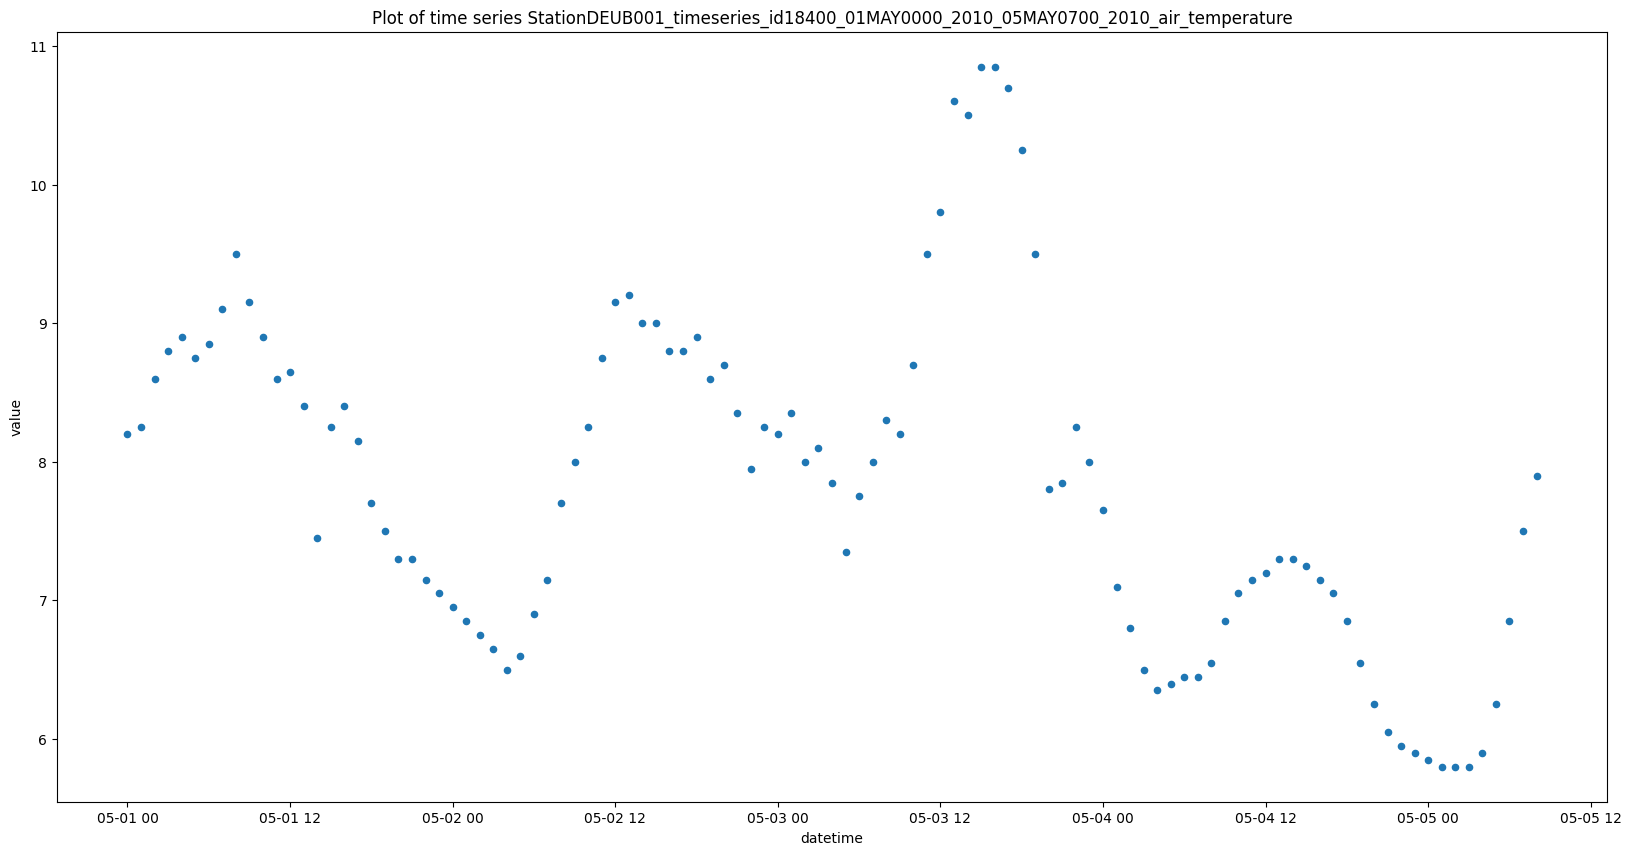

In [191]:
data.reset_index().plot(x="datetime", y="value", kind="scatter", title="Plot of time series StationDEUB001_timeseries_id18400_01MAY0000_2010_05MAY0700_2010_air_temperature", figsize=(20, 10));

In [31]:
data.head()

,value,flags,version,timeseries_id
datetime,,,,
2010-05-01 00:00:00+00:00,8.20,7,000001.000000.00000000000000,18400
2010-05-01 01:00:00+00:00,8.25,7,000001.000000.00000000000000,18400
2010-05-01 02:00:00+00:00,8.60,7,000001.000000.00000000000000,18400
2010-05-01 03:00:00+00:00,8.80,7,000001.000000.00000000000000,18400
2010-05-01 04:00:00+00:00,8.90,7,000001.000000.00000000000000,18400


In [32]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [192]:
data.reset_index(inplace=True)

In [56]:
data.head()

,datetime,value,flags,version,timeseries_id
0,2010-05-01 00:00:00+00:00,8.20,7,000001.000000.00000000000000,18400
1,2010-05-01 01:00:00+00:00,8.25,7,000001.000000.00000000000000,18400
2,2010-05-01 02:00:00+00:00,8.60,7,000001.000000.00000000000000,18400
3,2010-05-01 03:00:00+00:00,8.80,7,000001.000000.00000000000000,18400
4,2010-05-01 04:00:00+00:00,8.90,7,000001.000000.00000000000000,18400


In [193]:
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.sort_values('datetime')
data = data[['datetime', 'value']]

In [38]:
data.head()

,datetime,value
0,2010-05-01 00:00:00+00:00,8.20
1,2010-05-01 01:00:00+00:00,8.25
2,2010-05-01 02:00:00+00:00,8.60
3,2010-05-01 03:00:00+00:00,8.80
4,2010-05-01 04:00:00+00:00,8.90


In [132]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)


In [133]:
X_train = train_data['datetime'].astype(np.int64) // 10**9  # Convert datetime to epoch timestamp
y_train = train_data['value']
X_test = test_data['datetime'].astype(np.int64) // 10**9
y_test = test_data['value']


# Linear Regression

In [134]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)


LinearRegression()

In [115]:
print(model.fit)

<bound method LinearRegression.fit of LinearRegression()>


In [135]:
#next_timestamps = X_test[-1:].values.reshape(-1, 1) + np.array([3600, 7200, 10800])  # Add 1, 2, 3 hours to the last timestamp in the test set

predicted_values = model.predict(X_test.values.reshape(-1,1))


In [117]:
print(predicted_values)

[6.71721835 6.71210394 6.70698954 6.70187513 6.69676073 6.69164632
 6.68653192 6.68141751 6.6763031  6.6711887  6.66607429 6.66095989
 6.65584548 6.65073107 6.64561667 6.64050226 6.63538786 6.63027345
 6.62515904 6.62004464 6.61493023 6.60981583 6.60470142 6.59958702
 6.59447261 6.5893582  6.5842438  6.57912939 6.57401499 6.56890058
 6.56378617 6.55867177 6.55355736 6.54844296 6.54332855 6.53821415
 6.53309974 6.52798533 6.52287093 6.51775652 6.51264212 6.50752771
 6.5024133  6.4972989  6.49218449 6.48707009 6.48195568 6.47684127
 6.47172687 6.46661246 6.46149806 6.45638365 6.45126925 6.44615484
 6.44104043 6.43592603 6.43081162 6.42569722 6.42058281 6.4154684
 6.410354   6.40523959 6.40012519 6.39501078 6.38989637 6.38478197
 6.37966756 6.37455316 6.36943875 6.36432435 6.35920994 6.35409553]


In [136]:
from sklearn.metrics import mean_absolute_error
y_test = test_data['value']
actual_values = y_test.values.reshape(-1,1)
# Assuming you have the actual values in a variable named 'actual_values'
mae = mean_absolute_error(actual_values, predicted_values)
print("MAE:", mae)


MAE: 1.3029813130070689


In [137]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual_values, predicted_values)
print("MSE:", mse)


MSE: 2.116641192871284


In [138]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 1.4548681015374842


In [139]:
from sklearn.metrics import r2_score

r2 = r2_score(actual_values, predicted_values)
print("R2 Score:", r2)


R2 Score: -3.765968528024489


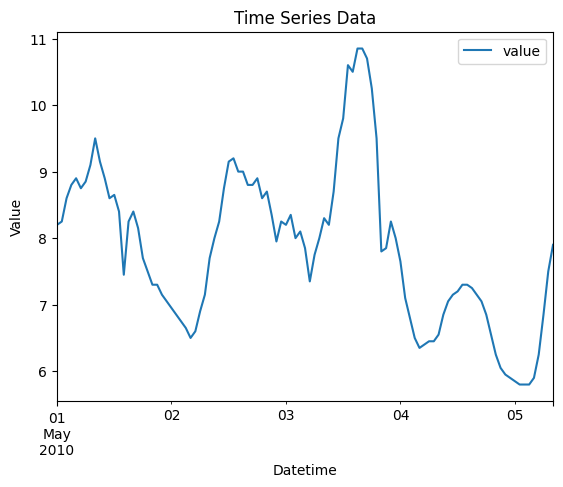

In [194]:
data.plot(x='datetime',y='value')

plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


# ARIMA

In [141]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['value'], order=(1, 3, 1))  # Replace p, d, q with appropriate values
model_fit = model.fit()


In [142]:
forecast = model_fit.forecast(steps=3)  # Replace 3 with the number of steps you want to forecast


In [143]:
print('y_test series:', y_test)
print('forecast series:', forecast)
# Concatenate the forecasted values DataFrame with the test series DataFrame
combined_data = pd.concat([y_test, forecast])

y_test series: 84     7.20
85     7.30
86     7.30
87     7.25
88     7.15
89     7.05
90     6.85
91     6.55
92     6.25
93     6.05
94     5.95
95     5.90
96     5.85
97     5.80
98     5.80
99     5.80
100    5.90
101    6.25
102    6.85
103    7.50
104    7.90
Name: value, dtype: float64
forecast series: 105    8.393880
106    8.858647
107    9.338290
Name: predicted_mean, dtype: float64


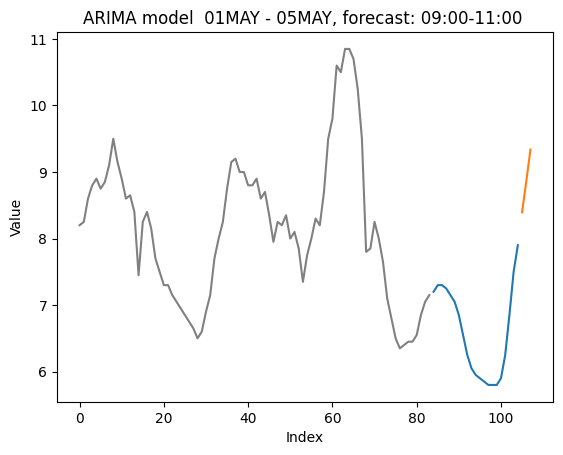

In [147]:
# Plot the combined_data
plt.plot(y_train.index, y_train,color='gray',label='Train')
plt.plot(y_test.index, y_test,label='Test')
plt.plot(forecast.index, forecast,label='Forecast')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('ARIMA model  01MAY - 05MAY, forecast: 09:00-11:00 ')
plt.show()

# RNN method

In [248]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [249]:
data.head()

,datetime,value,time
0,2010-05-01 00:00:00+00:00,8.20,00:00:00
1,2010-05-01 01:00:00+00:00,8.25,01:00:00
2,2010-05-01 02:00:00+00:00,8.60,02:00:00
3,2010-05-01 03:00:00+00:00,8.80,03:00:00
4,2010-05-01 04:00:00+00:00,8.90,04:00:00


In [250]:
# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values
print('values[:4]',values[:4])

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
print('scaler',scaler)
normalized_values = scaler.fit_transform(values.reshape(-1, 1))
print('normalized_values[:4]',normalized_values[:4])


values[:4] [8.2  8.25 8.6  8.8 ]
scaler MinMaxScaler()
normalized_values[:4] [[0.47524752]
 [0.48514851]
 [0.55445545]
 [0.59405941]]


In [251]:
# Define the size of the training set
train_size = int(len(normalized_values) * 0.8)  # 80% for training

# Split the data into training and testing sets
train_data = normalized_values[:train_size]
test_data = normalized_values[train_size:]


In [262]:
# Define the number of previous time steps to consider for each prediction
time_steps = 5

# Create input and output sequences for training and testing
def create_sequences(data, time_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps):
     
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
      
    return np.array(X), np.array(y)

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)




In [263]:
print('data[1:21 ',data[0:21])
print('data[1]',data[0:21])
print('X_test[:10]',X_test[:2])
print('y_test[:10] ',y_test[:2])
print('len(X_test),len(y_test)',len(X_test),len(y_test))
print('',type(X_test))

data[1:21                      datetime  value      time
0  2010-05-01 00:00:00+00:00   8.20  00:00:00
1  2010-05-01 01:00:00+00:00   8.25  01:00:00
2  2010-05-01 02:00:00+00:00   8.60  02:00:00
3  2010-05-01 03:00:00+00:00   8.80  03:00:00
4  2010-05-01 04:00:00+00:00   8.90  04:00:00
5  2010-05-01 05:00:00+00:00   8.75  05:00:00
6  2010-05-01 06:00:00+00:00   8.85  06:00:00
7  2010-05-01 07:00:00+00:00   9.10  07:00:00
8  2010-05-01 08:00:00+00:00   9.50  08:00:00
9  2010-05-01 09:00:00+00:00   9.15  09:00:00
10 2010-05-01 10:00:00+00:00   8.90  10:00:00
11 2010-05-01 11:00:00+00:00   8.60  11:00:00
12 2010-05-01 12:00:00+00:00   8.65  12:00:00
13 2010-05-01 13:00:00+00:00   8.40  13:00:00
14 2010-05-01 14:00:00+00:00   7.45  14:00:00
15 2010-05-01 15:00:00+00:00   8.25  15:00:00
16 2010-05-01 16:00:00+00:00   8.40  16:00:00
17 2010-05-01 17:00:00+00:00   8.15  17:00:00
18 2010-05-01 18:00:00+00:00   7.70  18:00:00
19 2010-05-01 19:00:00+00:00   7.50  19:00:00
20 2010-05-01 20:00:00+

In [264]:
# Define the RNN model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))  # Add dropout layer with a dropout rate of 0.2
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
#model.fit(X_train, y_train, epochs=50, batch_size=16)


Epoch 1/20
5/5 [==============================] - 3s 9ms/step - loss: 0.1769
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0980
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0467
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0215
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0299
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0314
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0233
Epoch 8/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0231
Epoch 9/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 10/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0222
Epoch 11/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0234
Epoch 12/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0239
Epoch 13/20
5/5 [==============================] - 0s 7ms/step - loss: 0.

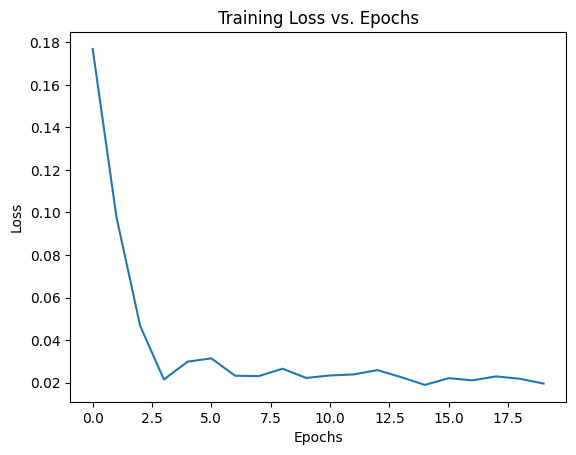

In [265]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=20, batch_size=16)

# Access the loss values from the history object
loss = history.history['loss']

# Plot the loss curve
plt.plot(range(len(loss)), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs')
plt.show()


In [266]:
# Generate predictions on the test data
y_pred = model.predict(X_test)
#print('X_test',X_test)
#print('y_pred',y_pred)
# Inverse transform the normalized predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)

# Inverse transform the normalized test data to the original scale
y_test = scaler.inverse_transform(y_test)


1/1 [==============================] - 0s 497ms/step


In [267]:
# Calculate evaluation metrics such as RMSE or MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 0.7591631268873975
MAE: 0.7197793126106264


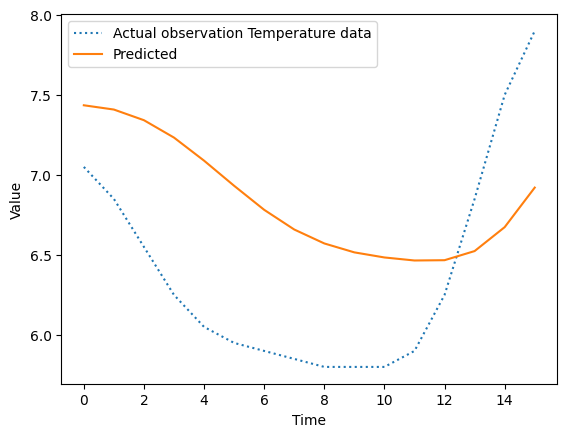

In [268]:
# Plot the actual values and the predictions
plt.plot(y_test, label='TOAR observed air_temperature data',linestyle='dotted')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [161]:
# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)


In [162]:
# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)


1/1 [==============================] - 0s 35ms/step


In [163]:
data.values.reshape(-1,1)
data.head()

,datetime,value
0,2010-05-01 00:00:00+00:00,8.20
1,2010-05-01 01:00:00+00:00,8.25
2,2010-05-01 02:00:00+00:00,8.60
3,2010-05-01 03:00:00+00:00,8.80
4,2010-05-01 04:00:00+00:00,8.90


In [171]:
data.head()

,datetime,value
0,2010-05-01 00:00:00+00:00,8.20
1,2010-05-01 01:00:00+00:00,8.25
2,2010-05-01 02:00:00+00:00,8.60
3,2010-05-01 03:00:00+00:00,8.80
4,2010-05-01 04:00:00+00:00,8.90


In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3
time_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, 9)
print('input_sequence',input_sequence)
# Generate the forecast for future points
forecast_0 = model.predict(input_sequence)
forecast_1 = model.predict(input_sequence)
forecast_2 = model.predict(input_sequence)

print('forecast_0',forecast_0)
print('forecast_1',forecast_1)
print('forecast_2',forecast_2)


# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast_0)
print('forecast',forecast)
# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
print('last_date',last_date)
future_dates = pd.date_range(last_date, freq = '1H', periods=future_steps, closed='right')
print('future_dates',future_dates)
# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])
print('all_dates.head()',all_dates.head())
print('all_dates.tail()',all_dates.tail())




input_sequence [[[0.00990099]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.01980198]
  [0.08910891]
  [0.20792079]
  [0.33663366]
  [0.41584158]]]
1/1 [==============================] - 0s 32ms/step
forecast_0 [[0.29442492]]
forecast_1 [[0.29442492]]
forecast_2 [[0.29442492]]
forecast [[7.2868457]]
last_date 2010-05-05 08:00:00+00:00
future_dates DatetimeIndex(['2010-05-05 09:00:00+00:00', '2010-05-05 10:00:00+00:00'], dtype='datetime64[ns, UTC]', freq='H')
all_dates.head() 0   2010-05-01 00:00:00+00:00
1   2010-05-01 01:00:00+00:00
2   2010-05-01 02:00:00+00:00
3   2010-05-01 03:00:00+00:00
4   2010-05-01 04:00:00+00:00
dtype: datetime64[ns, UTC]
all_dates.tail() 102   2010-05-05 06:00:00+00:00
103   2010-05-05 07:00:00+00:00
104   2010-05-05 08:00:00+00:00
0     2010-05-05 09:00:00+00:00
1     2010-05-05 10:00:00+00:00
dtype: datetime64[ns, UTC]


<ipython-input-270-40674a23227e>:43: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, freq = '1H', periods=future_steps, closed='right')


values[-1] [7.9]
forecast_extended=np.concatenate([values[-1:], forecast.flatten()]):  [7.9        6.91631413]


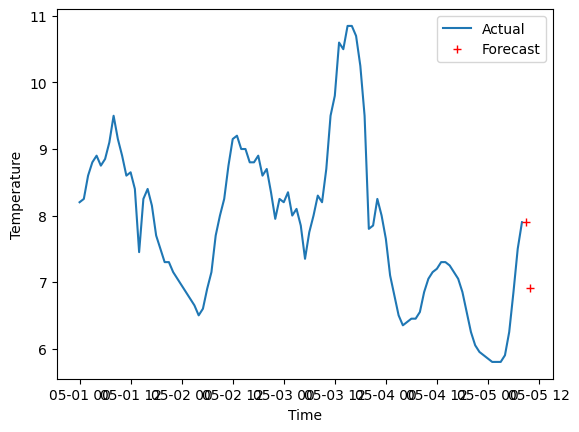

In [170]:
# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])
print('values[-1]',values[-1:])
print('forecast_extended=np.concatenate([values[-1:], forecast.flatten()]): ',forecast_extended)
# Plot the actual values and the forecasted values
plt.plot(all_dates[:len(values)], values,label='Actual')
plt.plot(all_dates[len(values):], forecast_extended,'r+', label='Forecast')

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

type(values) <class 'numpy.ndarray'>
[ 8.2   8.25  8.6   8.8   8.9   8.75  8.85  9.1   9.5   9.15  8.9   8.6
  8.65  8.4   7.45  8.25  8.4   8.15  7.7   7.5   7.3   7.3   7.15  7.05
  6.95  6.85  6.75  6.65  6.5   6.6   6.9   7.15  7.7   8.    8.25  8.75
  9.15  9.2   9.    9.    8.8   8.8   8.9   8.6   8.7   8.35  7.95  8.25
  8.2   8.35  8.    8.1   7.85  7.35  7.75  8.    8.3   8.2   8.7   9.5
  9.8  10.6  10.5  10.85 10.85 10.7  10.25  9.5   7.8   7.85  8.25  8.
  7.65  7.1   6.8   6.5   6.35  6.4   6.45  6.45  6.55  6.85  7.05  7.15
  7.2   7.3   7.3   7.25  7.15  7.05  6.85  6.55  6.25  6.05  5.95  5.9
  5.85  5.8   5.8   5.8   5.9   6.25  6.85  7.5   7.9 ]
1/1 [==============================] - 0s 54ms/step


<ipython-input-235-23fed817f36f>:35: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, freq='1H',periods=future_steps, closed='right')


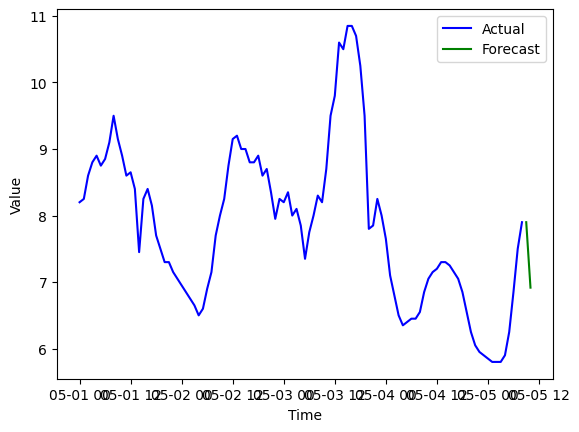

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values
print('type(values)',type(values))
print(values)
# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, freq='1H',periods=future_steps, closed='right')

# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])

# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
plt.plot(all_dates[:len(values)], values, label='Actual', color='blue')
plt.plot(all_dates[len(values):], forecast_extended, label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

2010-05-05 08:00:00+00:00
DatetimeIndex(['2010-05-05 09:00:00+00:00', '2010-05-05 10:00:00+00:00',
               '2010-05-05 11:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.frame.DataFrame'>
input_sequence [[[0.01980198]
  [0.00990099]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.01980198]
  [0.08910891]
  [0.20792079]
  [0.33663366]
  [0.41584158]]]


<ipython-input-269-a51bd15a9cb2>:24: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, freq='1H',periods=4, closed='right')


1/1 [==============================] - 0s 403ms/step
forecast_norm [[0.29481745]]
forecast from 20 last steps [[7.2888284]]
[[7.2888284]]
input_sequence [[[0.00990099]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.01980198]
  [0.08910891]
  [0.20792079]
  [0.33663366]
  [0.41584158]
  [0.2948175 ]]]
1/1 [==============================] - 0s 22ms/step
forecast_norm [[0.33458707]]
forecast from 20 last steps [[7.489665]]
input_sequence [[[0.        ]
  [0.        ]
  [0.        ]
  [0.01980198]
  [0.08910891]
  [0.20792079]
  [0.33663366]
  [0.41584158]
  [0.2948175 ]
  [0.33458713]]]
1/1 [==============================] - 0s 20ms/step
forecast_norm [[0.37149787]]
forecast from last steps [[7.6760645]]
df                      datetime  value      time
0   2010-05-01 00:00:00+00:00   8.20  00:00:00
1   2010-05-01 01:00:00+00:00   8.25  01:00:00
2   2010-05-01 02:00:00+00:00   8.60  02:00:00
3   2010-05-01 03:00:00+00:00   8.80  03:00:00
4   2010-05-01 04:00:00+00:00   8.90  04:00:00
.

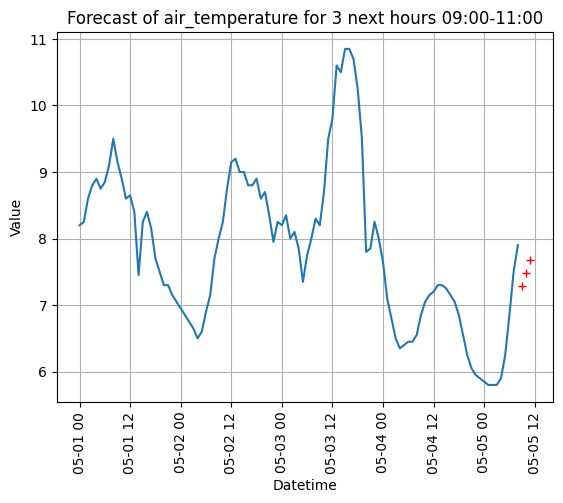

In [269]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
#data = {
#    'datetime': ['2010-05-01 00:00:00+00:00', '2010-05-01 01:00:00+00:00', '2010-05-01 02:00:00+00:00', '2010-05-01 03:00:00+00:00', '2010-05-01 04:00:00+00:00'],
#    'value': [8.20, 8.25, 8.60, 8.80, 8.90]
#}

# Create a DataFrame from the data

df = pd.DataFrame(data)

# Convert the 'datetime' column to datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the time from the 'datetime' column
df['time'] = df['datetime'].dt.time


# Generate future dates for the forecasted points
last_date = df['datetime'].iloc[-1]
print(last_date)
future_dates = pd.date_range(last_date, freq='1H',periods=4, closed='right')
print(future_dates)
print(type(future_dates))
print(type(df))
# Concatenate the original dates and the future dates
all_dates = pd.concat([df['datetime'], pd.Series(future_dates)])



# 1st Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))
# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, 10)
print('input_sequence',input_sequence)
# Generate the forecast for future points
forecast_norm = model.predict(input_sequence)
print('forecast_norm',forecast_norm)
# Inverse transform the normalized forecast to the original scale
forecast_1 = scaler.inverse_transform(forecast_norm)
print('forecast from 20 last steps',forecast_1)


# 2nd Normalize the values to a range between 0 and 1
print(forecast_1)
values_new = np.concatenate((values,forecast_1[0]))
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values_new.reshape(-1, 1))
# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, 10)
print('input_sequence',input_sequence)
# Generate the forecast for future points
forecast_norm = model.predict(input_sequence)
print('forecast_norm',forecast_norm)
# Inverse transform the normalized forecast to the original scale
forecast_2 = scaler.inverse_transform(forecast_norm)
print('forecast from 20 last steps',forecast_2)

# 3rd Normalize the values to a range between 0 and 1
values_3 = np.concatenate((values_new,forecast_2[0]))
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values_3.reshape(-1, 1))
# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, 10)
print('input_sequence',input_sequence)
# Generate the forecast for future points
forecast_norm = model.predict(input_sequence)
print('forecast_norm',forecast_norm)
# Inverse transform the normalized forecast to the original scale
forecast_3 = scaler.inverse_transform(forecast_norm)
print('forecast from last steps',forecast_3)



# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([forecast_1.flatten(),forecast_2.flatten(),forecast_3.flatten()])

print('df',df)
print('len(df)',len(df))
print('type(df)',type(df))
print('all_dates',all_dates)
print('len(all_dates)',len(all_dates))
print('type(all_dates)',type(all_dates))
print('forecast_extended',forecast_extended)
print('len(forecast_extended)',len(forecast_extended))
print('type(forecast_extended)',type(forecast_extended))
# Plotting
plt.plot(df['datetime'], df['value'],label='Historical T data')
plt.plot(future_dates, forecast_extended,'r+',label='Forecast')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Forecast of air_temperature for 3 next hours 09:00-11:00')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
